Linear part is at equation_solving.ipynb

In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division
import inspect
import cvxopt


Give here Newton Method

## Nonlinear Least  Square Problems  
Page 159  
Newton's method or a quasi-Newton method could be used to solve nonlinear problem.  
In Scipy, the function `optimize.leastsq` provides a nonlinear solver least square solver that uses the  
*Luvenberg_Marquardt* method. Which is based on the idea of successive linearizations of the problem in each iteration.

In [2]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2 * x**2)

xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05*np.random.randn(len(xdata))

def g(beta):
    return ydata - f(xdata, *beta)

beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)
beta_opt

array([0.2454085 , 0.75797344, 0.53709559])

Text(0, 0.5, '$f(x, \\beta)$')

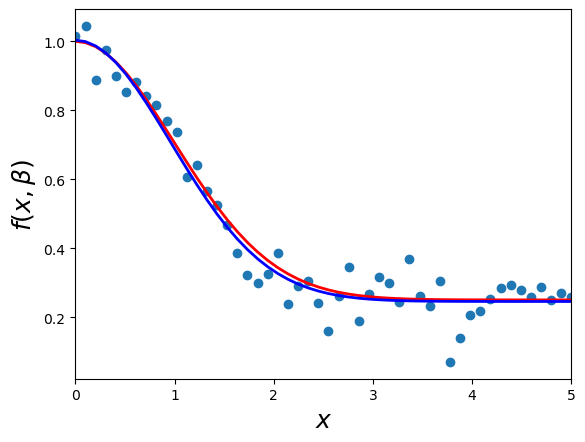

In [3]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)

The scipy optimize module also provides an alternative interface to nonlinear least square fitting

In [4]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.2454085 , 0.75797344, 0.53709559])

## Constrained Optimization
BFGS method in scipy.  
f(x) = (x1 - 1)v2 - (x2 - 1)v2. Subject ton the constraints 2 <= x1 <= 3 and 0 <= x2 <= 2  
To solve this problem, we first define a Python function for the objective functions and tuples with the  
boundaries for each of the two variables in this problem, according to the given constriants.

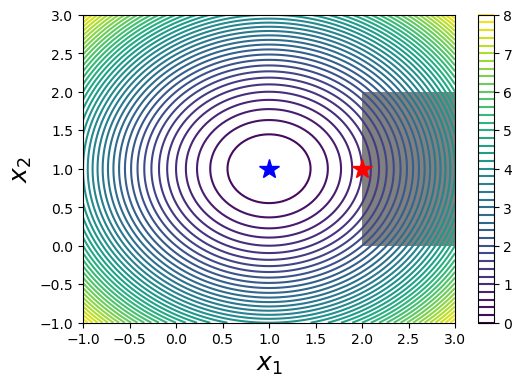

In [5]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)
def f(X):
    x, y = X
    return (x-1)**2 + (y-1)**2
x_opt = optimize.minimize(f, (1, 1), method='BFGS').x
bnd_x1, bnd_x2 = (2, 3), (0, 2)
x_cons_opt = optimize.minimize(f, np.array([1, 1]), method='L-BFGS-B',\
                                bounds=[bnd_x1, bnd_x2]).x

fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_, y_)
c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'b*', markersize=15)
ax.plot(x_cons_opt[0], x_cons_opt[1], 'r*', markersize=15)
bound_rect = plt.Rectangle((bnd_x1[0], bnd_x2[0]),\
    bnd_x1[1] - bnd_x1[0], bnd_x2[1] - bnd_x2[0],\
        facecolor="grey")

ax.add_patch(bound_rect)
ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)
plt.colorbar(c, ax=ax)

## Linear Programming
Simplex problem  
min c' x where Ax<= b  
Consider minimizing f(x) = -x0 + 2x1 - 3x2, subject to inequality constraints x0 + x1 <= 1, -x0 + 3x1 <= 2, -x1 + x2 <= 3.
c = (-1, 2, -3), b=(1,2,3)

In [13]:
c = np.array([-1.0, 2.0, -3.0])
A = np.array([[1.0, 1.0, 0.0],[-1.0,3.0,0.0],[0.0,-1.0,1.0]])
b = np.array([1.0,2.0,3.0])
A_ = cvxopt.matrix(A)
b_ = cvxopt.matrix(b)
c_ = cvxopt.matrix(c)

sol = cvxopt.solvers.lp(c_, A_, b_)
x = np.array(sol['x'])

Optimal solution found.


In [16]:
np.array(sol["x"])

array([[0.25],
       [0.75],
       [3.75]])